(-0.5, 1279.5, 719.5, -0.5)

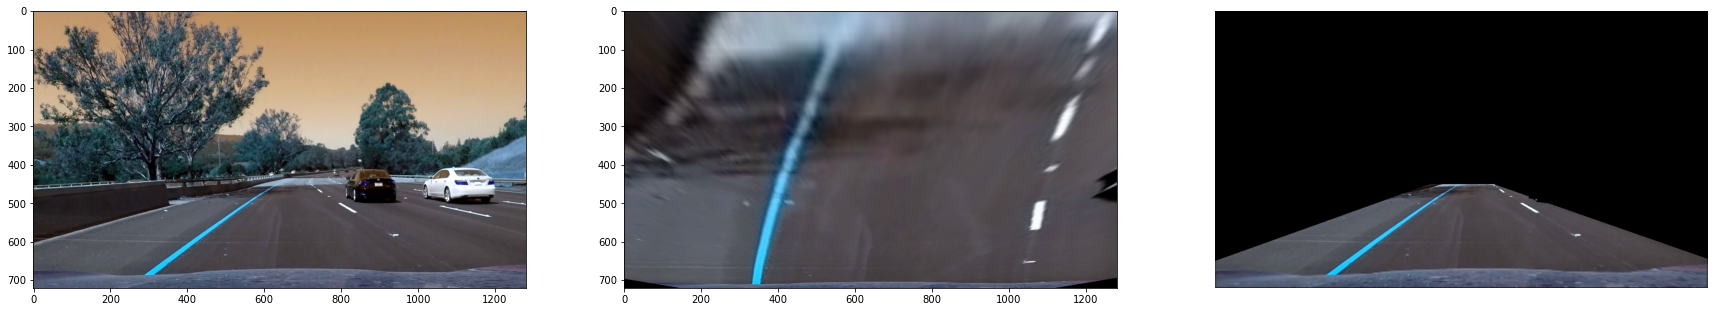

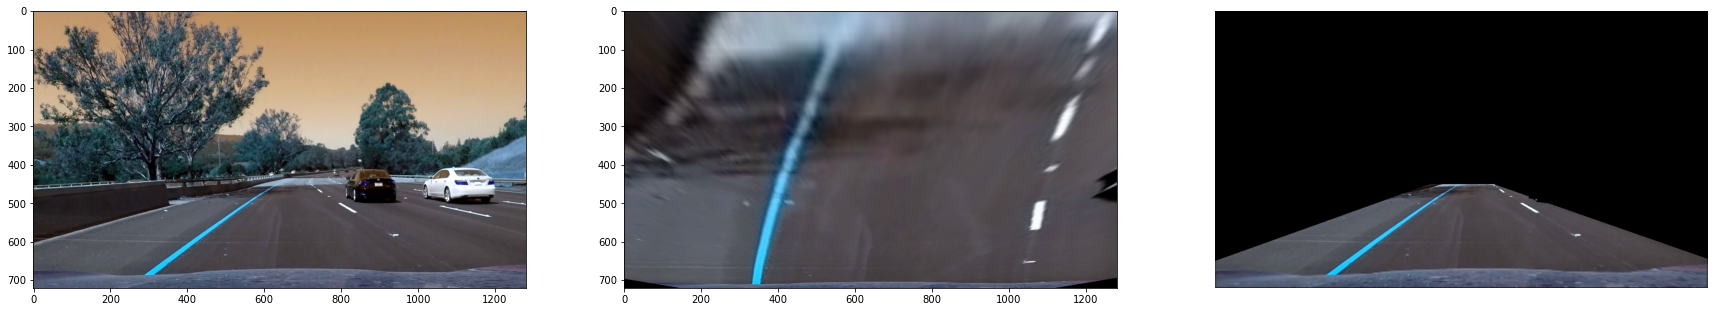

In [1]:
"""
投射变换
熟悉opencv相关函数

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


def perspective_transform(img):
	
    img_size = (img.shape[1], img.shape[0])

    src = np.float32(
        [[200, 720],
        [1100, 720],
        [595, 450],
        [685, 450]])
    
    dst = np.float32(
        [[300, 720],
        [980, 720],
        [300, 0],
        [980, 0]])

    ###########利用cv2.getPerspectiveTransform从原始src到dst点的矩阵m####################
    ###########利用cv2.getPerspectiveTransform从dst点到原始src的逆矩阵m####################

    ###########根据投射变换矩阵m， 利用cv2.warpPerspective函数将原图img转换成透射变换后的图wraped####################
    ###########根据投射变换逆矩阵m_inv， 将透射变换后的图wraped转换成原始图####################

    ###################################
    ############填空1（4行代码）###########################################################
    m = cv2.getPerspectiveTransform(src, dst)
    m_inv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, m, img_size)
    unwarped = cv2.warpPerspective(warped, m_inv, img_size)
    #####################################################################################

    plt.figure(figsize = (30, 30))
    plt.title('calibration')
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(warped)
    plt.subplot(1, 3, 3)
    plt.imshow(unwarped)
    plt.axis('off')
    return warped, unwarped, m, m_inv


img_file = './testImage/test6.jpg'
img = cv2.imread(img_file)

#########将img进行投射变换，返回投射变换后的图像，投射变换逆变换后的图像，投射变换矩阵和逆矩阵#######
#############填空2（1行代码）#########################################################
warped, unwarped, m, m_inv = perspective_transform(img)

#####################################################################################



plt.figure(figsize = (30, 30))
plt.title('perspective_transform')
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(warped)
plt.subplot(1, 3, 3)
plt.imshow(unwarped)
plt.axis('off')
